In [1]:
import warnings

warnings.simplefilter(action='ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import spacy
import re

from tqdm import tqdm
from nltk.corpus import stopwords
from string import punctuation
from nltk.util import ngrams

# Объявление функций и констант

In [3]:
sns.set()
tqdm.pandas()
nlp = spacy.load('ru_core_news_sm')
stop_words = stopwords.words('russian')

In [4]:
DATA_PATH = 'data/Датасет.xlsx'
SAVE_TO = 'data/dataset8.pkl'

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE
)

In [5]:
def intersection(b1, b_list):
    for b2 in b_list:
        if b1[-1] == b2[0] or b1[0] == b2[-1]:
            return True
    return False


def map_ngrams(bigram, req_bigrams, terms_bigrams):
    if req_bigrams and bigram in req_bigrams:
        return 0
    elif terms_bigrams and bigram in terms_bigrams:
        return 1
    elif req_bigrams and intersection(bigram, req_bigrams):
        return 3
    elif terms_bigrams and intersection(bigram, terms_bigrams):
        return 3
    else:
        return 2


def generate_dataset(df_slice):
    req_bigrams = list(ngrams(df_slice.loc['requirements_cleaned'], 4)) if not np.all(
        pd.isna(df_slice.loc['requirements_cleaned'])) else []
    terms_bigrams = list(ngrams(df_slice.loc['terms_cleaned'], 4)) if not np.all(
        pd.isna(df_slice.loc['terms_cleaned'])) else []

    res_df = pd.DataFrame()
    res_df['responsibilities_bigrams'] = list(ngrams(df_slice['responsibilities_cleaned'], 4))
    res_df['id'] = df_slice['id']
    res_df['class'] = res_df['responsibilities_bigrams'].apply(lambda x: map_ngrams(x, req_bigrams, terms_bigrams))

    return res_df[['id', 'responsibilities_bigrams', 'class']]

# Подготовка данных

In [7]:
df = pd.read_excel(DATA_PATH)
df.head()

,id,name(название),specialization(специализация),responsibilities(Должностные обязанности),requirements(Требования к соискателю),terms(Условия),skills(Ключевые навыки),salary_from,salary_to,object,...,updated_by,position,phone,website,email,image,unique_code,city_code,source_id,link_resource
0,9495846,Арматурщик,Арматурщик,Работа на строительных площадках. Очистных соо...,NaN,NaN,NaN,150000,170000,NaN,...,\N,Арматурщик,NaN,hh,hh@hh.ru,\N,HH-81058502,\N,1,https://hh.ru/vacancy/81058502
1,9495850,Арматурщик,Арматурщик,Гнутье арматурной стали на механических станка...,NaN,NaN,NaN,130000,150000,NaN,...,\N,Арматурщик,NaN,hh,hh@hh.ru,\N,HH-80163818,\N,1,https://hh.ru/vacancy/80163818
2,9495851,Арматурщик,Арматурщик,Вязка арматуры.,NaN,NaN,NaN,85000,90000,NaN,...,\N,Арматурщик,NaN,hh,hh@hh.ru,\N,HH-77729491,\N,1,https://hh.ru/vacancy/77729491
3,2,Арматурщик,Арматурщик,Выполнение работ по гнутью и резке арматурной ...,Выполнение работ по гнутью и резке арматурной ...,NaN,\N,50000,100000,"ООО ""АЛЬМИС_ИНТЕГРАЛ""",...,1,Арматурщик,74959214241,https://almisintegral.ru/,info@almisintegral.ru,\N,\N,\N,1,\N
4,9388857,Арматурщик,Арматурщик Вахта в мcк (питание+проживание) 60/30,Вахта в город Москва. Обязанности: - армирова...,опыт в строительстве приветствуется; работа в ...,продолжительность вахты 60/30 (продление вахты...,NaN,67000,134000,NaN,...,\N,Арматурщик,NaN,avito,avito@avito.ru,\N,A-3037298578,\N,1,https://avito.ru/3037298578


In [8]:
df_clf = df[[
    'id',
    'responsibilities(Должностные обязанности)',
    'requirements(Требования к соискателю)', 
    'terms(Условия)'
]]

In [9]:
df_clf

,id,responsibilities(Должностные обязанности),requirements(Требования к соискателю),terms(Условия)
0,9495846,Работа на строительных площадках. Очистных соо...,NaN,NaN
1,9495850,Гнутье арматурной стали на механических станка...,NaN,NaN
2,9495851,Вязка арматуры.,NaN,NaN
3,2,Выполнение работ по гнутью и резке арматурной ...,Выполнение работ по гнутью и резке арматурной ...,NaN
4,9388857,Вахта в город Москва. Обязанности: - армирова...,опыт в строительстве приветствуется; работа в ...,продолжительность вахты 60/30 (продление вахты...
...,...,...,...,...
994,9306889,Обязанности: Проектирование ультразвуковых пре...,NaN,офисные условия
995,9306890,"Внимание пока обьявление висит, ведется набор!...",Приветствуется опыт по установке систем кондиц...,Оплата производится раз в неделю по субботам!...
996,9306891,Требуется слесарь в цех по ремонту и балансиро...,Обучаем. Токарные навыки и сварочные навыки пр...,"Зарплата, график работы обсуждаются."
997,9306892,🔥 К нам в команду требуются: 🔸 Мастер по окле...,"пыт работы, знание и понимание принципов работ...",NaN


In [10]:
df_clf['responsibilities(Должностные обязанности)'] = df_clf['responsibilities(Должностные обязанности)'].apply(
    lambda x: str.lower(str(x)) if not pd.isna(x) else x
).apply(
    lambda x: re.sub(emoji_pattern, '', x)
)
df_clf['requirements(Требования к соискателю)'] = df_clf['requirements(Требования к соискателю)'].apply(
    lambda x: str.lower(str(x)) if not pd.isna(x) else x
)
df_clf['terms(Условия)'] = df_clf['terms(Условия)'].apply(lambda x: str.lower(str(x)) if not pd.isna(x) else x)

In [11]:
df_clf['responsibilities_spacy'] = df_clf['responsibilities(Должностные обязанности)'].progress_apply(lambda x: nlp(x) if not pd.isna(x) else x)
df_clf['requirements_spacy'] = df_clf['requirements(Требования к соискателю)'].progress_apply(lambda x: nlp(x) if not pd.isna(x) else x)
df_clf['terms_spacy'] = df_clf['terms(Условия)'].progress_apply(lambda x: nlp(x) if not pd.isna(x) else x)

100%|██████████| 999/999 [00:30<00:00, 32.44it/s]


In [12]:
df_clf

,id,responsibilities(Должностные обязанности),requirements(Требования к соискателю),terms(Условия),responsibilities_spacy,requirements_spacy,terms_spacy
0,9495846,работа на строительных площадках. очистных соо...,NaN,NaN,"(работа, на, строительных, площадках, ., очист...",NaN,NaN
1,9495850,гнутье арматурной стали на механических станка...,NaN,NaN,"(гнутье, арматурной, стали, на, механических, ...",NaN,NaN
2,9495851,вязка арматуры.,NaN,NaN,"(вязка, арматуры, .)",NaN,NaN
3,2,выполнение работ по гнутью и резке арматурной ...,выполнение работ по гнутью и резке арматурной ...,NaN,"(выполнение, работ, по, гнутью, и, резке, арма...","(выполнение, работ, по, гнутью, и, резке, арма...",NaN
4,9388857,вахта в город москва. обязанности: - армирова...,опыт в строительстве приветствуется; работа в ...,продолжительность вахты 60/30 (продление вахты...,"(вахта, в, город, москва, ., , обязанности, :...","(опыт, в, строительстве, приветствуется, ;, ра...","(продолжительность, вахты, 60/30, (, продление..."
...,...,...,...,...,...,...,...
994,9306889,обязанности: проектирование ультразвуковых пре...,NaN,офисные условия,"(обязанности, :, проектирование, ультразвуковы...",NaN,"(офисные, условия)"
995,9306890,"внимание пока обьявление висит, ведется набор!...",приветствуется опыт по установке систем кондиц...,оплата производится раз в неделю по субботам!...,"(внимание, пока, обьявление, висит, ,, ведется...","(приветствуется, опыт, по, установке, систем, ...","( , оплата, производится, раз, в, неделю, по, ..."
996,9306891,требуется слесарь в цех по ремонту и балансиро...,обучаем. токарные навыки и сварочные навыки пр...,"зарплата, график работы обсуждаются.","(требуется, слесарь, в, цех, по, ремонту, и, б...","(обучаем, ., токарные, навыки, и, сварочные, н...","(зарплата, ,, график, работы, обсуждаются, .)"
997,9306892,к нам в команду требуются: мастер по оклейк...,"пыт работы, знание и понимание принципов работ...",NaN,"( , к, нам, в, команду, требуются, :, , маст...","(пыт, работы, ,, знание, и, понимание, принцип...",NaN


In [13]:
for col in ['responsibilities', 'requirements', 'terms']:
    df_clf[f'{col}_cleaned'] = df_clf[f'{col}_spacy'].progress_apply(
        lambda doc: [
            w.text.strip() for w in doc
            if w.text not in list(punctuation) + ['—', '•', '·', '–', '”', '“', '×'] and
            w.lemma_.strip()
        ]
        if not pd.isna(doc) else doc
    )

100%|██████████| 999/999 [00:00<00:00, 5808.38it/s]


In [14]:
df_clf[[
    'responsibilities_cleaned', 'requirements_cleaned', 'terms_cleaned'
]]

,responsibilities_cleaned,requirements_cleaned,terms_cleaned
0,"[работа, на, строительных, площадках, очистных...",NaN,NaN
1,"[гнутье, арматурной, стали, на, механических, ...",NaN,NaN
2,"[вязка, арматуры]",NaN,NaN
3,"[выполнение, работ, по, гнутью, и, резке, арма...","[выполнение, работ, по, гнутью, и, резке, арма...",NaN
4,"[вахта, в, город, москва, обязанности, армиров...","[опыт, в, строительстве, приветствуется, работ...","[продолжительность, вахты, 60/30, продление, в..."
...,...,...,...
994,"[обязанности, проектирование, ультразвуковых, ...",NaN,"[офисные, условия]"
995,"[внимание, пока, обьявление, висит, ведется, н...","[приветствуется, опыт, по, установке, систем, ...","[оплата, производится, раз, в, неделю, по, суб..."
996,"[требуется, слесарь, в, цех, по, ремонту, и, б...","[обучаем, токарные, навыки, и, сварочные, навы...","[зарплата, график, работы, обсуждаются]"
997,"[к, нам, в, команду, требуются, мастер, по, ок...","[пыт, работы, знание, и, понимание, принципов,...",NaN


# Разметка данных для классификации

Обозначим классы как
- 0: requirement
- 1: term
- 2: other

In [15]:
final = pd.DataFrame()
for idx in tqdm(df_clf.index):
    final = pd.concat([final, generate_dataset(df_clf.loc[idx])], ignore_index=True)

final.index = range(len(final))

100%|██████████| 999/999 [00:06<00:00, 145.32it/s]


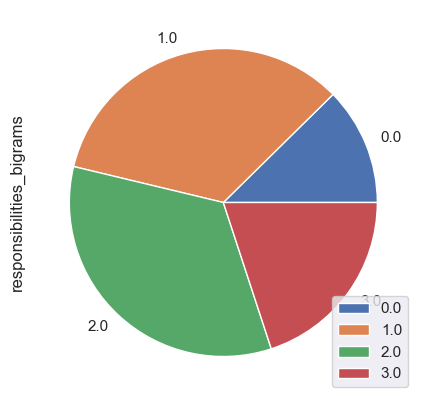

In [16]:
final.groupby('class').count()['responsibilities_bigrams'].plot(kind='pie', figsize=(7, 5), legend=True);

In [17]:
final = final[final['class'] != 3]

In [18]:
final.to_pickle(SAVE_TO)